In [70]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
stop_words = stopwords.words('english')
stop_words.extend(['the','and','is','was','of','in','very','with','we','it','also','very','this'])

In [67]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
df=pd.read_csv("TripAdvisorReviewsFinal.csv",delimiter=',',lineterminator='\n')

In [4]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
print(df.columns)

Index(['Hotel Name', 'Hotel City', 'Date of Stay', 'Review Title', 'Review',
       'Rating'],
      dtype='object')


In [5]:
df = df.sample(frac=1).reset_index(drop=True)
print(df.shape)

(27987, 6)


In [121]:
print(df.head())

                Hotel Name Hotel City    Date of Stay  \
0       Raddison Blu Hotel     Nagpur   December 2017   
1                Taj Mahal    Lucknow    January 2019   
2           Hotel Chanakya      Patna      April 2011   
3            Sayajji Hotel     Indore   February 2020   
4  Jehan Numa Palace Hotel     Bhopal   November 2016   

                                        Review Title  \
0                               Outstanding by Miles   
1                Special Thanks To Taj Mahal Lucknow   
2  UNEXPECTEDLY COMFORTABLE STAY IN PATNA WITH GR...   
3                                     Just wonderful   
4  nice service, nice food, and a dose of royality..   

                                              Review  Rating  Word Count  \
0  Its a great Hotel, wonderful Hospitality, all ...     5.0          46   
1  We would like to take this opportunity to expr...     5.0          68   
2  First thing the look of the hotel is superb,. ...     4.0          51   
3  Sayaji's hosp

In [7]:
df["Word Count"]=df["Review"].apply(lambda x: len(word_tokenize(x)))


In [122]:
print(df["Word Count"][:5])

0    46
1    68
2    51
3    60
4    58
Name: Word Count, dtype: int64


In [123]:
df["Character Count"]=df["Review"].apply(lambda x: len(x))
print(df["Character Count"][:5])

0    237
1    395
2    246
3    280
4    309
Name: Character Count, dtype: int64


In [13]:
def stop_word_count(text):
    c=0
    for w in text.split(' '):
        if w in stop_words:
            c+=1

    return(c)

In [120]:
df["Stopwords Count"]=df["Review"].apply(lambda x: stop_word_count(x))
print(df["Stopwords Count"][:5])

0    19
1    21
2    21
3    18
4    23
Name: Stopwords Count, dtype: int64


In [15]:
def count_special_characters(text):
    c=0
    for i in range(len(text)):
        ch=text[i]
        if(ch.isalnum() == False):
                c+=1

    return(c)

In [124]:
df["Special Character Count"]=df["Review"].apply(lambda x: count_special_characters(x))
print(df["Special Character Count"][:5])

0    45
1    69
2    52
3    58
4    59
Name: Special Character Count, dtype: int64


In [17]:
def count_numerics(text):
    c=0
    for i in range(len(text)):
        ch=text[i]
        if(ch.isdigit()):
            c+=1

    return(c)

In [125]:
df["Numerics Count"]=df["Review"].apply(lambda x: count_numerics(x))
print(df["Numerics Count"][:5])

0    0
1    0
2    0
3    2
4    0
Name: Numerics Count, dtype: int64


In [19]:
def count_uppercase(text):
    c=0
    
    for i in range(len(text)):
        ch=text[i]
        if(ch.isupper()):
            c+=1

    return(c)

In [126]:
df["UpperCase Count"]=df["Review"].apply(lambda x: count_uppercase(x))
print(df["UpperCase Count"][:5])

0    10
1    16
2     6
3     8
4     0
Name: UpperCase Count, dtype: int64


In [21]:
from sklearn.feature_extraction.text import CountVectorizer

def word_frequency(df):

    vec = CountVectorizer().fit(df)
    bag_of_words = vec.transform(df)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    
    
    return(words_freq)
    

In [22]:
word_freq =word_frequency(df["Review"])
sorted_word_freq =sorted(word_freq, key = lambda x: x[1], reverse=True)

In [23]:
print("Most Common Words in Reviews are:",sorted_word_freq[:10])
print("Most Rare Words in Reviews are:",sorted_word_freq[-11:-1])

Most Common Words in Reviews are: [('the', 106496), ('and', 78076), ('to', 46850), ('was', 38931), ('is', 34159), ('in', 30793), ('of', 29253), ('very', 25768), ('for', 24318), ('hotel', 23230)]
Most Rare Words in Reviews are: [('claustrophobia', 1), ('complimentory', 1), ('perfer', 1), ('o2spa', 1), ('beneath', 1), ('hanjoe', 1), ('andvinnay', 1), ('otm', 1), ('viswajeet', 1), ('seelrvef', 1)]


In [24]:
from collections import Counter

def most_common_trigrams(df):

    vectorizer = CountVectorizer(ngram_range = (3,3)) 
    X1 = vectorizer.fit_transform(df)  
    features = (vectorizer.get_feature_names()) 
    sums=X1.sum(axis=0)
    trigrams={}
    for col, term in enumerate(features): 
        trigrams[term]=sums[0,col]

    k=Counter(trigrams)
    m=k.most_common(10)
    print("Most Common Trigrams with their frequencies are:")
    for i in m:
        print("{0} : {1}".format(i[0],i[1]))

    

def most_common_bigrams(df):

    vectorizer = CountVectorizer(ngram_range = (2,2)) 
    X1 = vectorizer.fit_transform(df)  
    features = (vectorizer.get_feature_names()) 
    sums=X1.sum(axis=0)
    bigrams={}
    for col, term in enumerate(features): 
        bigrams[term]=sums[0,col]

    k=Counter(bigrams)
    m=k.most_common(10)
    print("Most Common Bigrams with their frequencies are:")
    for i in m:
        print("{0} : {1}".format(i[0],i[1]))
    

In [25]:
most_common_trigrams(df["Review"])


Most Common Trigrams with their frequencies are:
the hotel is : 1981
one of the : 1744
the food was : 1299
the rooms are : 1195
of the hotel : 1168
would like to : 1160
is very good : 1126
special thanks to : 1028
of the best : 982
the staff is : 979


In [26]:
most_common_bigrams(df["Review"])

Most Common Bigrams with their frequencies are:
the hotel : 8776
of the : 7911
in the : 6895
and the : 6409
the staff : 5871
at the : 5819
to the : 5167
was very : 5127
it was : 4888
is very : 4440


In [27]:
df["Year"]=df["Date of Stay"].apply(lambda x: str(x).strip(' ').split(' ')[-1])
df["Month"]=df["Date of Stay"].apply(lambda x: str(x).strip(' ').split(' ')[0])

In [28]:
print(df["Year"].value_counts())

2019    11968
2018     5281
2020     4418
2017     2885
2016     1653
2015     1039
2014      480
2013      162
2012       33
2010       23
2011       20
2008       11
2009        9
nan         4
2006        1
Name: Year, dtype: int64


In [29]:
reviews_2020=df[df["Year"]=='2020'].Review
reviews_2019=df[df["Year"]=='2019'].Review
reviews_2018=df[df["Year"]=='2018'].Review
reviews_2017=df[df["Year"]=='2017'].Review
reviews_2016=df[df["Year"]=='2016'].Review

In [30]:
word_freq_2020=word_frequency(reviews_2020)
df_2020=pd.DataFrame(word_freq_2020,columns=['Word','Frequency_2020'])

In [31]:
word_freq_2019=word_frequency(reviews_2019)
df_2019=pd.DataFrame(word_freq_2019,columns=['Word','Frequency_2019'])

In [32]:
word_freq_2018=word_frequency(reviews_2018)
df_2018=pd.DataFrame(word_freq_2018,columns=['Word','Frequency_2018'])

In [33]:
word_freq_2017=word_frequency(reviews_2017)
df_2017=pd.DataFrame(word_freq_2017,columns=['Word','Frequency_2017'])

In [34]:
word_freq_2016=word_frequency(reviews_2016)
df_2016=pd.DataFrame(word_freq_2016,columns=['Word','Frequency_2016'])

In [35]:
df_merge=pd.DataFrame()

In [36]:
df_merge=df_2020.merge(df_2019,on='Word').merge(df_2018,on='Word').merge(df_2017,on='Word').merge(df_2016,on='Word')

In [127]:
print(df_merge.head())

          Word  Frequency_2020  Frequency_2019  Frequency_2018  \
0       sayaji             113             352               8   
1  hospitality             575            1841             725   
2           is            4802           12911            6574   
3       beyond              95             238              97   
4         this            1656            5010            2417   

   Frequency_2017  Frequency_2016  growth  
0               2               1     341  
1             368             151     597  
2            4112            2714    -489  
3              45              21      75  
4            1521             924     148  


In [38]:
growth=[]
for i in range(len(df_merge)):
    growth.append(df_merge['Frequency_2019'][i]-df_merge['Frequency_2018'][i]-df_merge['Frequency_2017'][i]-df_merge['Frequency_2016'][i])



In [39]:
df_merge["growth"]=growth
print(df_merge[["Word","growth"]].sort_values(by='growth',ascending=False))

            Word  growth
10           and    6548
45           was    3388
91            to    2739
205         very    2640
100        staff    1829
40           for    1585
5             my    1552
124           at    1358
15           the    1316
169        great    1311
118      service    1282
63            we    1269
29          stay    1246
102           mr    1161
171          our    1105
30          with    1072
97          food    1042
117       thanks    1006
148        thank     926
55            by     923
59            us     899
60          good     870
77           all     862
104         team     845
96       amazing     832
214   experience     779
188       always     750
157         nice     727
149        again     723
377       mumbai     710
...          ...     ...
311      located    -154
168      airport    -161
382           if    -162
82         there    -171
163         city    -177
373          has    -182
375       hotels    -184
371       oberoi    -188


In [40]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer() 

def text_sentiment(text):
    sentiment_dict = sia.polarity_scores(text) 

    if sentiment_dict['compound'] > 0.5 : 
        return("Positive") 
  
    elif sentiment_dict['compound'] < -0.5 : 
        return("Negative") 
  
    else : 
        return("Neutral") 
    


In [41]:
df["Review Sentiment"]=df["Review"].apply(lambda x: text_sentiment(x))


Text(0.5, 1.0, 'Review Sentiment distribution')

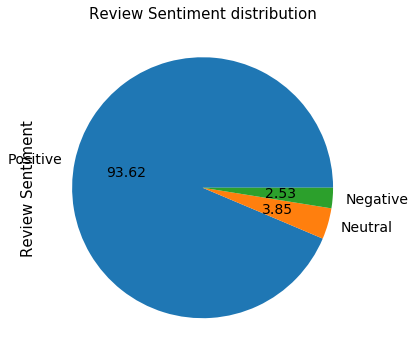

In [134]:
df["Review Sentiment"].value_counts().plot.pie(autopct='%.2f', fontsize=14, figsize=(6, 6))
plt.title('Review Sentiment distribution')

In [43]:
pos_reviews=df[df["Review Sentiment"] == 'Positive'].Review
neg_reviews=df[df["Review Sentiment"] == 'Negative'].Review

In [69]:
pos_word_freq=word_frequency(pos_reviews)
pos_word_freq=[x for x in pos_word_freq if x[0] not in stop_words]
sorted_pos_word_freq =sorted(pos_word_freq, key = lambda x: x[1], reverse=True)


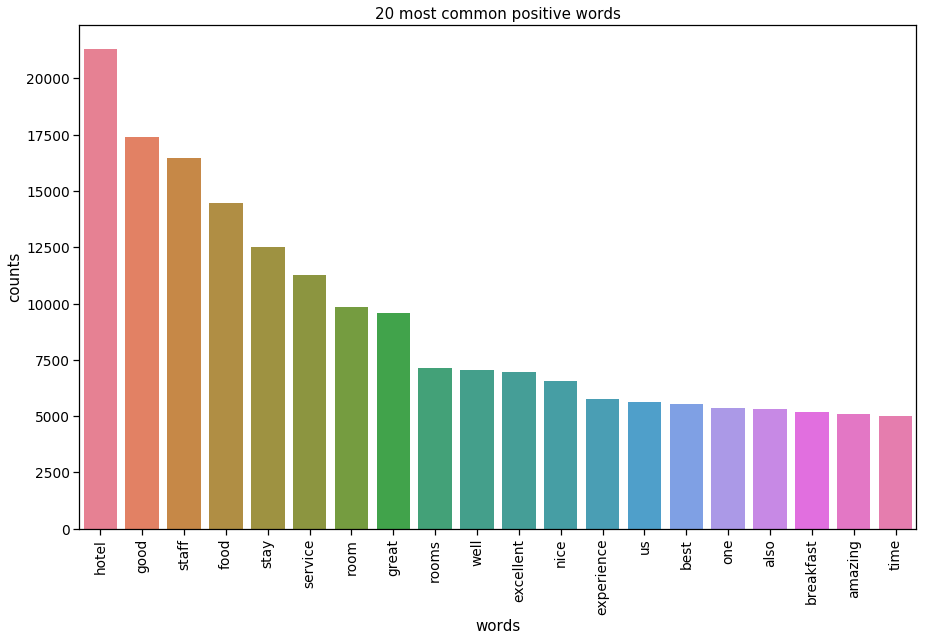

In [128]:
common_20_words=sorted_pos_word_freq[:20]
words = [w[0] for w in common_20_words]
counts = [w[1] for w in common_20_words]
x_pos = np.arange(len(words)) 

plt.figure(2, figsize=(15, 15/1.6180))
plt.subplot(title='20 most common positive words')
sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
sns.barplot(x_pos, counts, palette='husl')
plt.xticks(x_pos, words, rotation=90) 
plt.xlabel('words')
plt.ylabel('counts')
plt.show()

In [45]:
neg_word_freq=word_frequency(neg_reviews)
neg_word_freq=[x for x in neg_word_freq if x[0] not in stop_words]
sorted_neg_word_freq =sorted(neg_word_freq, key = lambda x: x[1], reverse=True)
print("Most Common Negative Words  are:",sorted_neg_word_freq[:20])

Most Common Negative Words  are: [('hotel', 851), ('room', 695), ('staff', 397), ('service', 309), ('one', 277), ('food', 266), ('rooms', 257), ('good', 213), ('time', 211), ('stay', 208), ('even', 201), ('check', 194), ('us', 188), ('experience', 182), ('bad', 165), ('stayed', 158), ('breakfast', 153), ('poor', 150), ('night', 141), ('property', 140)]


In [97]:
punctuations=['?','.',',','!']
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()


def remove_stopwords_and_lemmatize(text):
    words=word_tokenize(text)
    lemmatized_words=[]
    for word in words:
        word=word.lower()
        if word in punctuations:
            continue
            
        elif word in stop_words:
            continue
            
        else:
            lemmatized_words.append(lemmatizer.lemmatize(word))
            
            
    lemmatized_text=' '.join(lemmatized_words)
    return(lemmatized_text)
            
    
  
    

In [98]:
df["Lemmatized Review"]=df["Review"].apply(lambda x: remove_stopwords_and_lemmatize(x))

In [99]:
print(df["Lemmatized Review"][:20])

0     great hotel wonderful hospitality smile reason...
1     would like take opportunity express heartfelt ...
2     first thing look hotel superb food drink taksh...
3     sayaji 's hospitality beyond comparable 4th vi...
4     first thing notice hotel sincerity courtesy st...
5     service hotel commendable excellent.hospitalit...
6     thank holiday inn jaipur excellent service rea...
7     visited hotel birthday celebration friend .. e...
8     hotel definitely best destination to stay com...
9     organised birthday party hotel ambiance hotel ...
10    n't stayed oberoi hotel - n't give full mark a...
11    amazing derive food .. sister 's engagement .....
12    wonderful discovery food mango tree delicious ...
13    hi writing express appreciation thanks quality...
14    service excellent courteous prompt room well m...
15    location hotel make exploring city easy travel...
16    situated quite close airport radisson blu nagp...
17    lovely room courteous staff good food spre

In [100]:
lemmatized_word_freq=word_frequency(df["Lemmatized Review"])

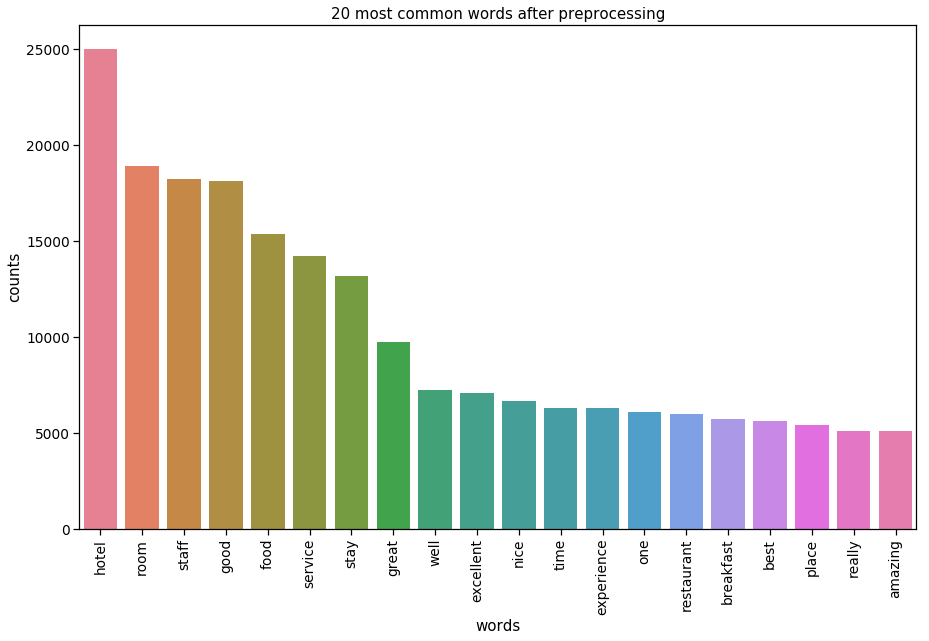

In [130]:
sorted_lemmatized_word_freq =sorted(lemmatized_word_freq, key = lambda x: x[1], reverse=True)
common_20_lemmatized_words=sorted_lemmatized_word_freq[:20]
words = [w[0] for w in common_20_lemmatized_words]
counts = [w[1] for w in common_20_lemmatized_words]
x_pos = np.arange(len(words)) 

plt.figure(2, figsize=(15, 15/1.6180))
plt.subplot(title='20 most common words after preprocessing')
sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
sns.barplot(x_pos, counts, palette='husl')
plt.xticks(x_pos, words, rotation=90) 
plt.xlabel('words')
plt.ylabel('counts')
plt.show()

In [102]:
from sklearn.feature_extraction.text import CountVectorizer

In [103]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10
                            )

data_vectorized = vectorizer.fit_transform(df["Lemmatized Review"])

In [104]:
data_dense = data_vectorized.todense()

In [105]:
from sklearn.decomposition import LatentDirichletAllocation

In [106]:
lda_model = LatentDirichletAllocation(n_components=5,               
                                      max_iter=50,               
                                      learning_method='online',   
                                      random_state=100,     
                                      n_jobs = -1,               
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

print(lda_model)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=5, n_jobs=-1, n_topics=None, perp_tol=0.1,
             random_state=100, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)


In [107]:
print("Log Likelihood: ", lda_model.score(data_vectorized))

Log Likelihood:  -6644685.83246702


In [108]:
print("Perplexity: ", lda_model.perplexity(data_vectorized))

Perplexity:  944.9356536368292


In [110]:
lda_output = lda_model.transform(data_vectorized)

In [111]:
topicnames = ["Topic" + str(i) for i in range(lda_model.n_components)]

In [64]:
df_topic_keywords = pd.DataFrame(lda_model.components_)

df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = topicnames

df_topic_keywords.head()

,00,000,01,02,04,05,10,100,1000,10pm,...,young,your,yours,yourself,yr,yum,yummy,zeeshan,zero,zone
Topic0,0.200742,0.201282,0.212482,3.220692,3.035225,0.208064,0.205615,0.210658,0.200811,0.200555,...,23.321494,117.905378,0.203108,0.205959,0.209293,0.212758,209.152901,0.202373,0.205996,0.206343
Topic1,0.201638,0.201520,0.204702,0.203093,0.201448,0.207250,0.204317,44.371984,0.203405,0.205167,...,0.204542,0.206069,0.203771,0.201033,0.204992,0.209173,0.205687,0.200746,0.201459,53.748399
Topic2,0.202516,0.202534,0.203333,0.203323,7.455572,0.203034,0.205762,99.370184,0.202519,0.203018,...,127.456012,271.057030,0.203103,0.209216,22.040734,0.207994,0.203762,0.200962,17.887933,0.207935
Topic3,94.767728,22.399087,20.163422,18.038499,8.592283,19.379305,671.141846,0.215007,20.421920,12.151788,...,31.962323,428.725128,14.646676,14.017428,0.216991,0.207179,0.203531,1.072495,0.244863,0.211142
Topic4,0.200786,0.200847,0.212238,0.209570,0.212623,0.226504,0.204891,0.212700,0.203504,0.200692,...,0.216353,508.469971,0.214121,0.209221,15.733381,30.570782,0.203598,23.196512,0.206286,0.206048


In [113]:
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=10):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=10)        

df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9
Topic 0,good,room,hotel,staff,food,stay,great,nice,service,breakfast
Topic 1,hotel,room,taj,one,staff,time,restaurant,stayed,service,night
Topic 2,stay,made,special,experience,itc,amazing,chef,time,property,make
Topic 3,food,service,staff,good,mr,hotel,stay,great,thanks,team
Topic 4,hotel,room,check,one,like,staff,even,get,day,service


In [115]:
import pyLDAvis.sklearn

In [ ]:
pyLDAvis.enable_notebook()

In [117]:
panel = pyLDAvis.sklearn.prepare(lda_model, data_vectorized,vectorizer,mds='tsne')

C:\Users\Saurabh\AppData\Local\Programs\Python\Python37\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [119]:
pyLDAvis.display(panel)

In [136]:
pyLDAvis.save_html(panel,'lda.html')